In [1]:
%pylab inline
from sci378 import *
from lmfit import *
from pyndamics3 import Simulation
from pyndamics3.fit import fit, Parameter

Populating the interactive namespace from numpy and matplotlib
Version:  0.0.18
pyndamics3  version  0.0.28


In [2]:
data=pd.read_csv('fludata3.csv')
data=data[data['region']=='Bay Area']
data=data[data['season']=='2019-2020']
data

,season,date_code,weekending,region,Total_ILI,Total_Patients_Seen,Percent_ILI,Number_Providers_Reporting
5634,2019-2020,201940,10/5/2019,Bay Area,373,18247,2.04,27
5640,2019-2020,201941,10/12/2019,Bay Area,395,18222,2.17,24
5646,2019-2020,201942,10/19/2019,Bay Area,490,18530,2.64,27
5652,2019-2020,201943,10/26/2019,Bay Area,526,19048,2.76,26
5658,2019-2020,201944,11/2/2019,Bay Area,519,17646,2.94,27
5664,2019-2020,201945,11/9/2019,Bay Area,618,19061,3.24,27
5670,2019-2020,201946,11/16/2019,Bay Area,658,18617,3.53,28
5676,2019-2020,201947,11/23/2019,Bay Area,635,19434,3.27,26
5682,2019-2020,201948,11/30/2019,Bay Area,490,13864,3.53,26
5688,2019-2020,201949,12/7/2019,Bay Area,643,19834,3.24,28


In [3]:
t_data=data['weekending']
t_data=date_to_float(data['weekending'])
t_data=t_data-min(t_data)
y_data=data['Percent_ILI']

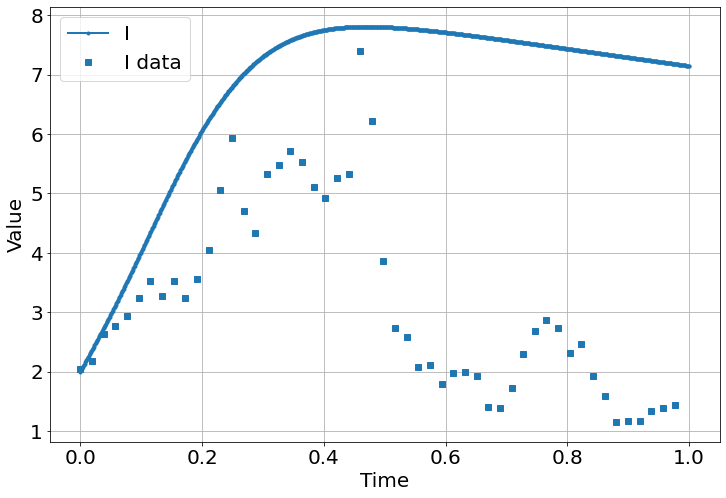

<Figure size 864x576 with 0 Axes>

In [4]:
#SEIR
sim=Simulation()
sim.add("N=S+E+I+R",100)
sim.add("S'=-β*S*I/N",6)
sim.add("E'= β*I*S/N-δ*E",.5)
sim.add("I'=δ*E-γ*I",2,plot=True)
sim.add("R'=γ*I",5)
sim.add_data(t=t_data,I=y_data,plot=True)
sim.params(β=20,δ=40,γ=.2)
sim.run(1)

In [5]:
result3=fit(sim,
           Parameter("β",value=1,min=0),
           Parameter("δ",value=1,min=0),
           Parameter("γ",value=1,min=0))
result3

Text(0, 0.5, 'Percent Infected')

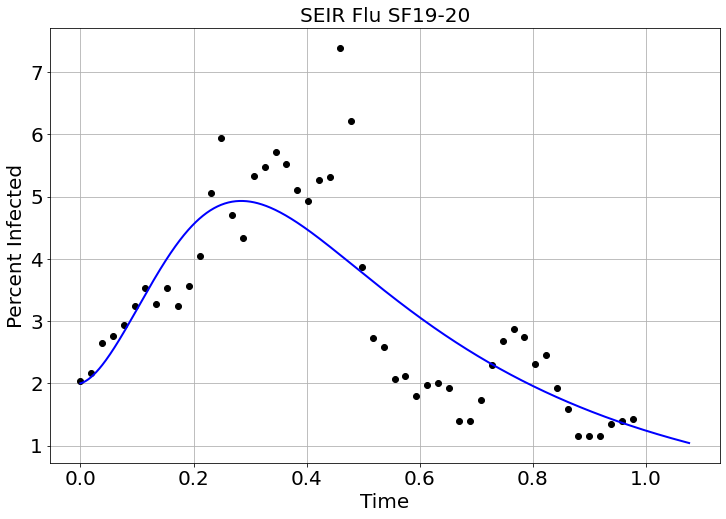

In [6]:
plot(t_data,y_data,'ko')
plot(sim.t,sim.I,'b-')
title('SEIR Flu SF19-20')
xlabel('Time')
ylabel('Percent Infected')

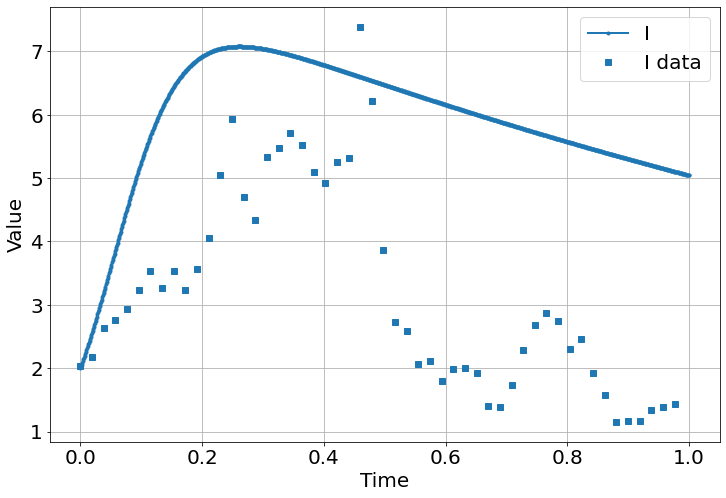

<Figure size 864x576 with 0 Axes>

In [7]:
#SIR
simm=Simulation()
simm.add("N=S+I+R",100)
simm.add("S'=-β*S*I/N",6)
simm.add("I'=β*S*I/N-γ*I",2,plot=True)
simm.add("R'=γ*I",.5)
simm.add_data(t=t_data,I=y_data,plot=True)
simm.params(β=20,γ=.5)
simm.run(1)

In [8]:
result4=fit(simm,
           Parameter("β",value=1,min=0),
           Parameter("γ",value=1,min=0))
result4

Text(0, 0.5, 'Percent Infected')

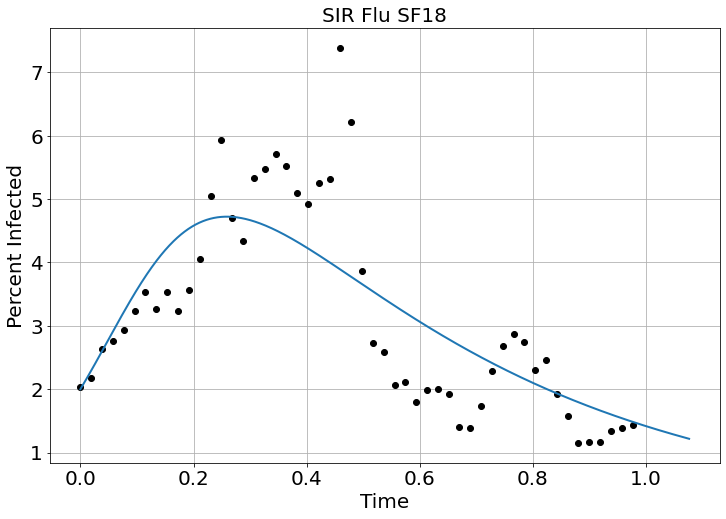

In [9]:
plot(t_data,y_data,'ko')
plot(simm.t,simm.I)
title('SIR Flu SF18')
xlabel('Time')
ylabel('Percent Infected')

Text(0, 0.5, 'percent infected')

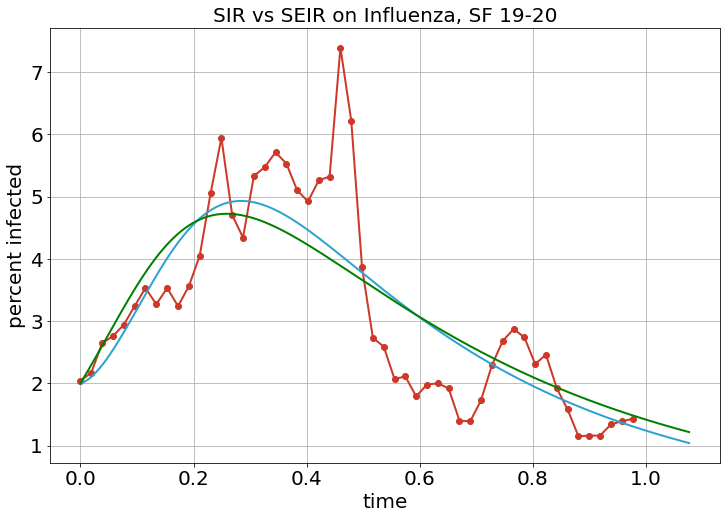

In [10]:
plot(t_data,y_data,'-o',color='#CD3828')
plot(sim.t,sim.I,'-',color='#2EA3CE')
#format(plot(sim.t,sim.I,'-',color='#2EA3CE'),'.2f')
plot(simm.t,simm.I,'g-')
title("SIR vs SEIR on Influenza, SF 19-20")
xlabel("time")
ylabel("percent infected")
#format(ylabel("percent infected"),'.2f')
#format(yaxis,'.2f')